<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2022/23 Term 2
</div>

# CS105 Group Project Submission

-----
<img src="attachment:info.png" width="60" align="left"/>Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

#### Section: G4
#### Team: T7
#### Members:
1. Ng Yi Tong
2. Lim ZhengLong Brian
3. Pan Mingwei
4. Chew Jun Liang Jerome
5. Lee Wen Jin

#### Dataset: credit

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

**Response:** 

This dataset contains relevant information about individuals applying for credit facility in a bank. Each row contains either numerical or categorical information and the approval outcome of each individual. The dataset contains 1000 rows and 23 columns.

**b.** State the size of the dataset

**Response:** 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("credit.csv")
print("The size of the data set is, row:" , df.shape[0] , "Column:" , df.shape[1])

The size of the data set is, row: 1000 Column: 23


**c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Response:**

![image-3.png](attachment:image-3.png)

### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

**Response:** 

In [2]:
print(df.count())

ID                  1000
Checking_Account    1000
Duration            1000
Payment_Status      1000
Purpose             1000
Amount              1000
Savings_Account     1000
Employment          1000
Installment         1000
Personal_Status     1000
Guarantors          1000
Residence_Length     966
Assets              1000
Age                 1000
Credit_Rating       1000
Existing_Credits    1000
Housing_Type        1000
Num_Credits          969
Occupation          1000
Dependents          1000
Telephone           1000
Foreign_Worker      1000
Approval            1000
dtype: int64


In [3]:
df_with_empty = df[["Residence_Length", "Num_Credits"]]
length_of_df = len(df)
residence_length_missing = df_with_empty.isnull().sum()[0]
num_credits_missing = df_with_empty.isnull().sum()[1] 

data = [{"Variable Name": "Residence", "Number of missing data": residence_length_missing, "Total number of data": length_of_df, "Percentage of missing data": (residence_length_missing/length_of_df)*100},
       {"Variable Name": "Num_credits", "Number of missing data": num_credits_missing, "Total number of data": length_of_df, "Percentage of missing data": (num_credits_missing/length_of_df)*100}
       ]

percent_missing_df = pd.DataFrame(data, columns = ["Variable Name","Number of missing data", "Total number of data", "Percentage of missing data"])
percent_missing_df

,Variable Name,Number of missing data,Total number of data,Percentage of missing data
0,Residence,34,1000,3.4
1,Num_credits,31,1000,3.1


In [4]:
# Find the mode of Num_Credits
print(df.Num_Credits.value_counts(), "\n")

1.0    615
2.0    321
3.0     27
4.0      6
Name: Num_Credits, dtype: int64 



Base on the table above, there are missing data in **Residence_Length** and **Num_Credits**.

There are 3.4% of missing data in Residence_length and 3.1% missing data in Num_Credits

We have decided to remove all rows containing NULL values from **Residence_Length** as it is a duration and a continuous variable. We would not be able to predict the duration. Furthermore, the missing data makes up for 3.4%, which we assume would not affect the data significantly if it was removed

We have decided to replace all the NULL values of **Num_Credits** with the mode of the column. The value 1 has the most frequency in Num_Credits, by replacing the NULL values with 1, we assume that it would not affect the outcome of the data significantly.

In [5]:
# changing null values in Num_Credits to its mode 
num_credits_mode = df.Num_Credits.mode()[0]
df["Num_Credits"].fillna(num_credits_mode, inplace=True)

# removing remaining null values
df.dropna(inplace = True)
print(df.count())

ID                  966
Checking_Account    966
Duration            966
Payment_Status      966
Purpose             966
Amount              966
Savings_Account     966
Employment          966
Installment         966
Personal_Status     966
Guarantors          966
Residence_Length    966
Assets              966
Age                 966
Credit_Rating       966
Existing_Credits    966
Housing_Type        966
Num_Credits         966
Occupation          966
Dependents          966
Telephone           966
Foreign_Worker      966
Approval            966
dtype: int64


**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

**Response:** 

Firstly, we checked through the categorical data to search for values that are out of the given range

In [6]:
df.iloc[:, [1,3,4,6,7,9,10,11,12,14,15,16,18,20,21,22]].describe()

,Checking_Account,Payment_Status,Purpose,Savings_Account,Employment,Personal_Status,Guarantors,Residence_Length,Assets,Credit_Rating,Existing_Credits,Housing_Type,Occupation,Telephone,Foreign_Worker,Approval
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,2.576605,2.553830,2.817805,2.104555,3.384058,2.686335,1.145963,2.876812,2.369565,70.625259,2.671843,1.931677,2.902692,1.399586,1.038302,0.688406
std,1.256622,1.085324,2.732255,1.577182,1.209854,0.702298,0.477926,1.121777,1.051555,35.691690,0.708917,0.528455,0.654085,0.490067,0.192024,0.463385
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,41.000000,3.000000,2.000000,3.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,1.000000,3.000000,2.000000,94.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000
75%,4.000000,4.000000,3.000000,3.000000,5.000000,3.000000,1.000000,4.000000,3.000000,99.000000,3.000000,2.000000,3.000000,2.000000,1.000000,1.000000
max,4.000000,4.000000,10.000000,5.000000,5.000000,4.000000,3.000000,5.000000,4.000000,99.000000,3.000000,3.000000,4.000000,2.000000,2.000000,1.000000


1. We had separated each variable based on the their various types, allowing us to narrow our work to smaller dataset of categorical type data. 


2. Using the df.iloc[:, [1,3,4,6,7,9,10,11,12,14,15,16,18,20,21,22]].describe() command, we showed the minimum and maximum of all variables.


3. For those of categorical types, we had determined the validite of existing data based on the given business rules.


4. Through these checks, we had found out several outlier values: **residence_length had values greater than 4 and credit_rating had values less than 1**

As there are out of range values in Residence_Length and Credit_Rating, the affected rows will be removed

Giving us the updated row counts below

In [7]:
# removing out of range values from residence length and credit rating
df.drop(df[df.Residence_Length >4].index, inplace = True)
df.drop(df[df.Credit_Rating <1].index, inplace = True)

print(df.count())

ID                  951
Checking_Account    951
Duration            951
Payment_Status      951
Purpose             951
Amount              951
Savings_Account     951
Employment          951
Installment         951
Personal_Status     951
Guarantors          951
Residence_Length    951
Assets              951
Age                 951
Credit_Rating       951
Existing_Credits    951
Housing_Type        951
Num_Credits         951
Occupation          951
Dependents          951
Telephone           951
Foreign_Worker      951
Approval            951
dtype: int64


### Displaying boxplot to identify potential outliers

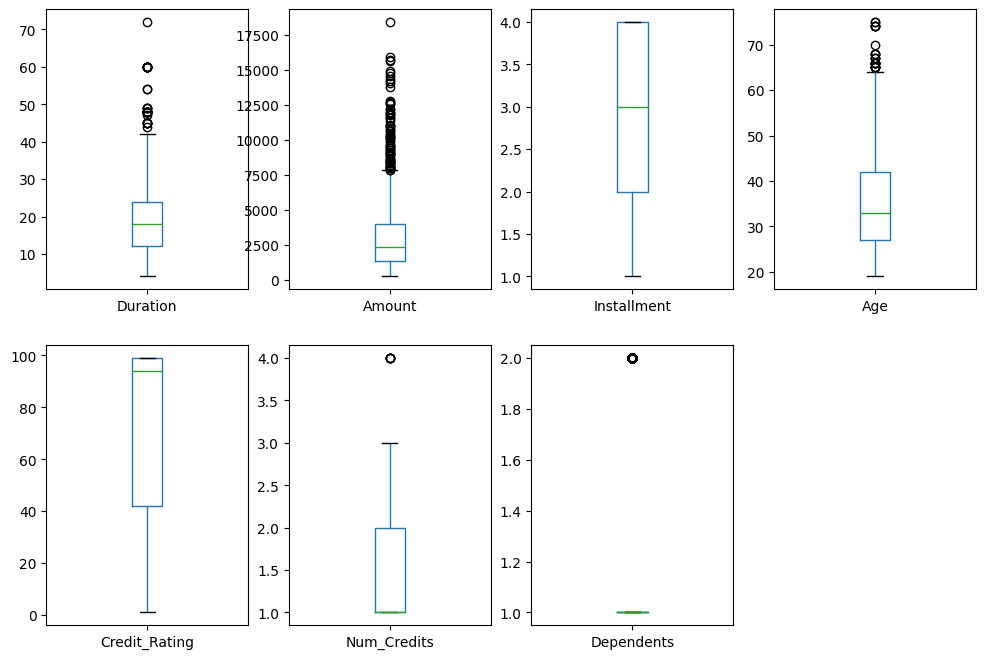

In [8]:
df_numerics = df[["Duration","Amount","Installment","Age", "Credit_Rating","Num_Credits", "Dependents"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(12, 8))
plt.show()

### Calculation of upper and lower fence 

In [9]:
# calculating the upper and lower fence 

# selecting the columns needed for iqr
# 2='Duration',5='Amount',13='Age',17='Num_Credits',19='Dependents'
df_numerical = df.iloc[:, [2,5,13,17,19]]
upper_fence_list = []
lower_fence_list = []

len_of_df_numerical = df_numerical.shape[1]
for row in range(len_of_df_numerical):
    q3 = df_numerical.iloc[:,row].describe()[6]
    q1 = df_numerical.iloc[:,row].describe()[4]
    iqr = q3 - q1
    upper_fence = q3 + (1.5 * iqr)
    lower_fence = q1 - (1.5 * iqr)
    upper_fence_list.append(upper_fence)
    lower_fence_list.append(lower_fence)


upper_lower_df = pd.DataFrame(list(zip(upper_fence_list, lower_fence_list)),
              columns=['Upper Fence','Lower Fence'],
             index = ['Duration','Amount','Age','Num_Credits','Dependents'])
upper_lower_df

,Upper Fence,Lower Fence
Duration,42.00,-6.00
Amount,7832.75,-2497.25
Age,64.50,4.50
Num_Credits,3.50,-0.50
Dependents,1.00,1.00


For better visualisation of outliers for each affected column, we decided to find out the percentage of outliers

In [10]:
#outlier percentage
outlier_df = df[["Duration", "Amount" ,"Age","Num_Credits","Dependents"]]
length_of_df = len(df)
duration_outlier_data = len(df[(df.Duration > upper_fence_list[0])])
amount_outlier_data = len(outlier_df[(df.Amount > upper_fence_list[1])])

age_outlier_data = len(df[(df.Age > upper_fence_list[2])])
num_credits_outlier_data = len(df[(df.Num_Credits > upper_fence_list[3])])
dependents_outlier_data = len(df[(df.Dependents > upper_fence_list[4])])

data = [{"Variable Name": "Duration", "Number of outlier data": duration_outlier_data, "Total number of data": length_of_df, "Percentage of outlier data": (duration_outlier_data/length_of_df)*100},
       {"Variable Name": "Amount", "Number of outlier data": amount_outlier_data, "Total number of data": length_of_df, "Percentage of outlier data": (amount_outlier_data/length_of_df)*100},
       {"Variable Name": "Age", "Number of outlier data": age_outlier_data, "Total number of data": length_of_df, "Percentage of outlier data": (age_outlier_data/length_of_df)*100},
       {"Variable Name": "Num_Credits", "Number of outlier data": num_credits_outlier_data, "Total number of data": length_of_df, "Percentage of outlier data": (num_credits_outlier_data/length_of_df)*100},
       {"Variable Name": "Dependents", "Number of outlier data": dependents_outlier_data, "Total number of data": length_of_df, "Percentage of outlier data": (dependents_outlier_data/length_of_df)*100}
       ]

percent_outlier_df = pd.DataFrame(data, columns = ["Variable Name","Number of outlier data", "Total number of data", "Percentage of outlier data"])
percent_outlier_df

,Variable Name,Number of outlier data,Total number of data,Percentage of outlier data
0,Duration,64,951,6.729758
1,Amount,69,951,7.255521
2,Age,23,951,2.418507
3,Num_Credits,5,951,0.525762
4,Dependents,149,951,15.667718


### 1. Dealing with Amount outliers

The percentage of outliers for amount is 7.3%. We have decided to keep the outliers for loan amounts, as a diverse group of individuals might have different reasons for taking out a loan. An example would be taking out a loan for business, which would account for the stark increase in loan amount. Hence, depending on the loan purpose, it is possible to have loan amounts that are significantly larger than the upper quartile range. Therefore, we have decided not to remove the outliers for Amount.


### 2. Dealing with Duration outliers

The percentage of outliers for duration is 6.7%. As we have determined that it is possible for loan amounts to be large, it makes sense that a longer duration will be needed to repay those loans. Which accounts for the longer duration seen in the data, making it a valid representation

### 3. Dealing with Age outliers

The percentage of outliers for age is 2.4%. We have decided that the age range above the maximum values are valuable and sensible. 
It is highly likely that the age group of 65-75 would possibly take a loan out. Furthermore, it is a unique demographic group, which
further adds substantial value in our dataset.


### 4. Dealing with Num Credits outliers

The percentage of outliers for num of credits is 0.53%. We believe that it is very reasonable and plausible for an individual to have 4 existing credits, and that is the only value that is an outlier in the data given for Num_Credits. We decided to keep the outliers as their values are reasonable and represent genuine values that are of interest to the analysis, hence the outliers represent a small but valid group of individuals in the population, and should be taken into account.


### 5. Dealing with Dependents outliers

The percentage of outliers for dependents is 15.7%. We believe that it is very reasonable and plausible for an individual to have 2 dependents, and that is the only value that is an outlier in the data given for Dependents. We decided to keep the outliers as we deem that the values represent genuine values that are of interest to the analysis, hence removing them would result in a loss of representation of a valid group of individuals in the population.

**c.** For categorical variables, perform the necessary encoding.

**Response:** 

All categorical data in the dataset are already in numerical values, there is no need to encode the data.

### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

**Response:** 


#### Categorical Variables

In [11]:
#Categorical Data
print("CATEGORICAL DATA\n")


print("--- Checking Account ---")

data_checking_acc = df["Checking_Account"].astype(str).value_counts(normalize=True)
credit_location = ["$0", "less than $200", "at least $200", "no checking account"]

for x, y in zip(credit_location, data_checking_acc.sort_index() * len(df)):
    if x != "no checking account":
        print(f"{int(y)} people have {x} in their checking account.")
    else:
        print(f"{int(y)} people do not have a checking account.")

print("\n")

#PAYMENT STATUS
# df["Payment_Status"] = df["Payment_Status"].astype(str)
data_payment_status = df["Payment_Status"].astype(str).value_counts()

print("--- Payment Status ---")
print("Applicants with no credits taken:" , data_payment_status.sort_index()[0])
print("Applicants with all credits paid back:", data_payment_status.sort_index()[1])
print("Applicants with existing credits paid back till now:", data_payment_status.sort_index()[2])
print("Applicants with delay in paying off in the past:", data_payment_status.sort_index()[3])
print("Applicants with critical account:", data_payment_status.sort_index()[4])
print("\n")


#PURPOSE
# df["Purpose"] = df["Purpose"].astype(str)
data_payment_status = df["Purpose"].value_counts()

payment_status = ["car(new)", "car(used)", "furniture/equipment", 
                  "radio/television", "domestic appliances", 
                  "repairs", "education", "vacation", "retraining", 
                  "business", "others"]

# print(data_payment_status.append(pd.Series([0], index=[7])).sort_index())
data_payment_status[7] = 0
# print(data_payment_status.sort_index())

print("--- Purpose of credit ---")
for x, y in zip(payment_status, data_payment_status.sort_index()):
        
    print(x, ":", y)
print("There is no data for the purpose \"vacation\", hence we manually input the count as 0.\n\n")

#EXISTING CREDITS
# df["Existing_Credits"] = df["Existing_Credits"].astype(str)
data = df["Existing_Credits"].astype(str).value_counts(normalize=True)
credit_location = ["banks", "stores", "none"]

print("--- Existing Credits ---")
for x, y in zip(credit_location, data.sort_index() * len(df)):
    if x != "none":
        print(f"{int(y)} people have other existing credit in {x}.")
    else:
        print(f"{int(y)} people do not have existing credit in place.")
        
print("\n")

#HOUSING TYPE
# df["Housing_Type"] = df["Housing_Type"].astype(str) 
data = df["Housing_Type"].astype(str).value_counts(normalize=True)
housing_types = ["rent", "own", "free"]

print("--- Housing Type ---")
for x, y in zip(housing_types, data.sort_index() * len(df)):
    if x != "free":
        print(f"{int(y)} people {x} their housing.")
    else:
        print(f"{int(y)} people live in {x} housing.")
print("\n")


#OCCUPATION
# df["Occupation"] = df["Occupation"].astype(str) 
data = df["Occupation"].astype(str).value_counts(normalize=True)
occupation_types = ["unemployed or unskilled non-residents", "unskilled residents", "skilled employees or officials", "work in management or are self-employed"]

print("--- Occupation ---")
for x, y in zip(occupation_types, data.sort_index() * len(df)):
    print(f"{int(y)} people are {x}.")
print("\n") 
    
    
    
#SAVINGS ACCOUNT
# df["Savings_Account"] = df["Savings_Account"].astype(str)     
data = df["Savings_Account"].astype(str).value_counts()

Savings_Account = ["less than $100", "between $100 to $500","between $500 to $1000", "more than $3000", "unknown or have no savings account"]

print("--- Savings Account ---")
for x, y in zip(Savings_Account, data.sort_index()):
    if x == "unknown or have no savings account" :
        print(f"{int(y)} people's savings account is {x}.")
    else :
        print(f"{int(y)} people's savings account has {x}.")
print("\n")


#EMPLOYMENT
# df["Employment"] = df["Employment"].astype(str)     
data = df["Employment"].astype(str).value_counts()

Employment = ["unemployed", "less than 1 year","1 to 4 years", "4 to 7 years", "more than 7 years"]

print("--- Employment ---")
for x, y in zip(Employment, data.sort_index()):
    if x == "unemployed" :
        print(f"{int(y)} people are {x}.")
    else :
        print(f"{int(y)} people are currently employed {x}.")
print("\n")


#PERSONAL STATUS
# df["Personal_Status"] = df["Personal_Status"].astype(str) 
data = df["Personal_Status"].astype(str).value_counts(normalize=True) 
status_types = ["divorced/separated males", "single males", "married/widowed males", "females"] 
 
sorted_data = data.sort_index() 
 
print("--- Personal Status ---")
for x, y in zip(status_types, data.sort_index() * len(df)): 
    print(f"{int(y)} people are {x}.")
print("\n")


#GUARANTORS
# df["Guarantors"] = df["Guarantors"].astype(str) 
data = df["Guarantors"].astype(str).value_counts(normalize=True) 
guarantor_types = ["guarantors", "co-applicants", "neither"] 
 
sorted_data = data.sort_index(ascending=False) 
 
print("--- Guarantors ---")
for x, y in zip(guarantor_types, sorted_data * len(df)): 
    print(f"{int(y)} people have {x}.")
print("\n")


#RESIDENCE LENGTH
# df["Residence_Length"] = df["Residence_Length"].astype(str) 
data = df["Residence_Length"].astype(str).value_counts(normalize=True) 
length_types = ["< 1 year", "1-2 years", "2-3 years", "> 3 years"] 
 
sorted_data = data.sort_index() 

print("--- Residence Length ---")
for x, y in zip(length_types, sorted_data * len(df)): 
    print(f"{int(y)} people have been staying in current residence for {x}.")
print("\n") 
    
    
#ASSETS
# df["Assets"] = df["Assets"].astype(str) 
data = df["Assets"].astype(str).value_counts(normalize=True) 
asset_types = ["real estate", "savings agreement/life insurance", "car or other", "unknown/none"] 
 
sorted_data = data.sort_index()
 
print("--- Assets ---")
for x, y in zip(range(len(asset_types)), sorted_data * len(df)): 
    if(x == 2): 
        print(f"{int(y)} people own {asset_types[x]}, {asset_types[x - 1]}, {asset_types[x - 2]}.") 
    elif(x == 1): 
        print(f"{int(y)} people own {asset_types[x]}, {asset_types[x - 1]}.") 
    else: 
        print(f"{int(y)} people own {asset_types[x]}.")
print("\n")
    
    
    
#Foreign Worker
# df["Foreign_Worker"] = df["Foreign_Worker"].astype(str) 
data = df["Foreign_Worker"].value_counts(normalize = True)
foreign_types = ["foreign workers", "Not foreign workers"]

print("--- Foreign Worker ---")
for x, y in zip(foreign_types, data.sort_index() * len(df)):
    print(f"{int(y)} people are {x}.")
print("\n")
    
#Approval
# df["Approval"] = df["Approval"].astype(str) 
data = df["Approval"].value_counts(normalize = True)
approve_result = ["Not Approved", "Approved"]

print("--- Approval ---")
for x, y in zip(approve_result, data.sort_index() * len(df)):
    print(f"{int(y)} people are {x}.")
print("\n")
    
#Telephone
# df["Telephone"] = df["Telephone"].astype(str) 
data = df["Telephone"].value_counts(normalize = True)
register_type = ["number not registered", "number registered"]

print("--- Telephone ---")
for x, y in zip(register_type, data.sort_index() * len(df)):
    print(f"{int(y)} people have their {x}.")

CATEGORICAL DATA

--- Checking Account ---
258 people have $0 in their checking account.
260 people have less than $200 in their checking account.
61 people have at least $200 in their checking account.
372 people do not have a checking account.


--- Payment Status ---
Applicants with no credits taken: 38
Applicants with all credits paid back: 48
Applicants with existing credits paid back till now: 497
Applicants with delay in paying off in the past: 85
Applicants with critical account: 283


--- Purpose of credit ---
car(new) : 220
car(used) : 100
furniture/equipment : 174
radio/television : 270
domestic appliances : 12
repairs : 20
education : 45
vacation : 0
retraining : 9
business : 90
others : 11
There is no data for the purpose "vacation", hence we manually input the count as 0.


--- Existing Credits ---
133 people have other existing credit in banks.
45 people have other existing credit in stores.
773 people do not have existing credit in place.


--- Housing Type ---
167 peop

#### Numerical Variables

In [12]:
#There are 7 numerical columns
Duration = df["Duration"].describe()
Amount = df["Amount"].describe()
Installment = df["Installment"].describe()
Age = df["Age"].describe()
Credit_Rating = df["Credit_Rating"].describe()
num_credits = df["Num_Credits"].describe()
Dependents = df["Dependents"].describe()


data = [{ "Count": Duration[0], "Mean": "{:.1f}".format(Duration[1]), "STD":"{:.1f}".format(Duration[2]), "Min" :Duration[3],"Max":Duration[7],"25%":Duration[4],"50%":Duration[5],"75%":Duration[6]},
       {"Count": Amount[0], "Mean": "{:.1f}".format(Amount[1]), "STD":"{:.1f}".format(Amount[2]) ,"Min" :Amount[3],"Max":Amount[7],"25%":Amount[4],"50%":Amount[5],"75%":Amount[6]},
        { "Count": Installment[0], "Mean": "{:.1f}".format(Installment[1]), "STD":"{:.1f}".format(Installment[2]), "Min" :Installment[3],"Max":Installment[7],"25%":Installment[4],"50%":Installment[5],"75%":Installment[6]},
        { "Count": Age[0], "Mean": "{:.1f}".format(Age[1]), "STD":"{:.1f}".format(Age[2]), "Min" :Age[3],"Max":Age[7],"25%":Age[4],"50%":Age[5],"75%":Age[6]},
        { "Count": Credit_Rating[0], "Mean":"{:.1f}".format(Credit_Rating[1]), "STD":"{:.1f}".format(Credit_Rating[2]), "Min" :Credit_Rating[3],"Max":Credit_Rating[7],"25%":Credit_Rating[4],"50%":Credit_Rating[5],"75%":Credit_Rating[6]},
        { "Count": num_credits[0], "Mean": "{:.1f}".format(num_credits[1]), "STD":"{:.1f}".format(num_credits[2]), "Min" :num_credits[3],"Max":num_credits[7],"25%":num_credits[4],"50%":num_credits[5],"75%":num_credits[6]},
        { "Count": Dependents[0], "Mean": "{:.1f}".format(Dependents[1]), "STD":"{:.1f}".format(Dependents[2]), "Min" :Dependents[3],"Max":Dependents[7],"25%":Dependents[4],"50%":Dependents[5],"75%":Dependents[6]}
       ]

numerical_summary_df = pd.DataFrame(data, columns = ["Count","Mean", "STD", "Min","Max","25%","50%","75%",],
                                   index = ['Duration','Amount','Installment','Age','Credit_Rating','Num_Credits','Dependents'])
numerical_summary_df

,Count,Mean,STD,Min,Max,25%,50%,75%
Duration,951.0,20.8,11.9,4.0,72.0,12.0,18.0,24.0
Amount,951.0,3261.1,2759.3,250.0,18424.0,1376.5,2333.0,3959.0
Installment,951.0,3.0,1.1,1.0,4.0,2.0,3.0,4.0
Age,951.0,35.6,11.4,19.0,75.0,27.0,33.0,42.0
Credit_Rating,951.0,70.8,35.5,1.0,99.0,42.0,94.0,99.0
Num_Credits,951.0,1.4,0.6,1.0,4.0,1.0,1.0,2.0
Dependents,951.0,1.2,0.4,1.0,2.0,1.0,1.0,1.0


**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

**Response:** 

**Checking Account**

    Most of the applicants have no checking account with the bank. 
    There is an even number of applicants who have $0 or less than $200, about 200 each
    Those who have more than $200 in their checking account are the least likely to apply for credit facility

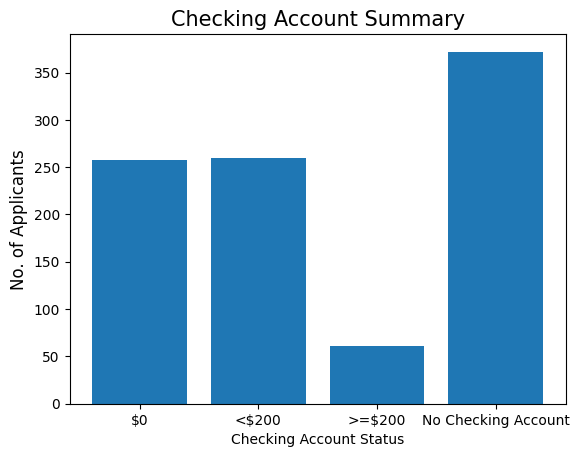

In [13]:
# Checking_account
data = df["Checking_Account"].value_counts().sort_index()
Checking_Account = ["$0", "<$200",">=$200", "No Checking Account"]

xs2 = Checking_Account
ys2 = data

plt.bar(xs2, ys2)
plt.title("Checking Account Summary", fontsize=15)
plt.xlabel("Checking Account Status")
plt.ylabel("No. of Applicants", fontsize=12)
plt.show()

**Savings Account**

    Majority of the applicants have less than $100 in their savings account. 
Applicants that have more than $3000 in their savings account make up the least amount in this dataset.

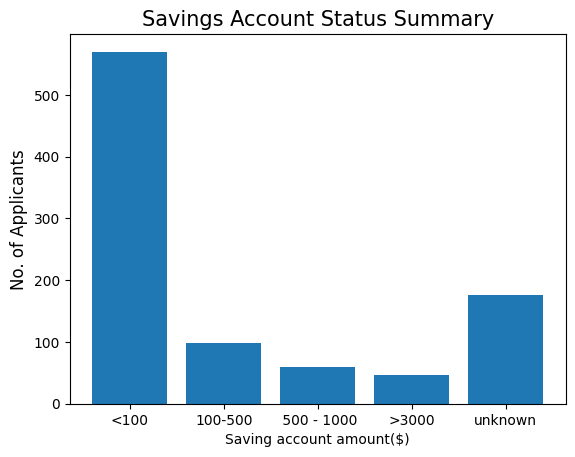

In [14]:
#Savings_Account
data = df["Savings_Account"].value_counts().sort_index()
Savings_Account = ["<100", "100-500"," 500 - 1000", ">3000", "unknown"]

xs = Savings_Account
ys = data
plt.bar(xs, ys)
plt.title("Savings Account Status Summary", fontsize=15)
plt.xlabel("Saving account amount($)")
plt.ylabel("No. of Applicants", fontsize=12)
plt.show()

**Employment**

There are more people applying for a credit facility who has been employed for between 1 to 2 years than those who have been employed for more than 3 years. 

There is a similar number of applicants who are employed for less than 1 year and between 2 to 3 years.
There are 50 applicants who are unemployed

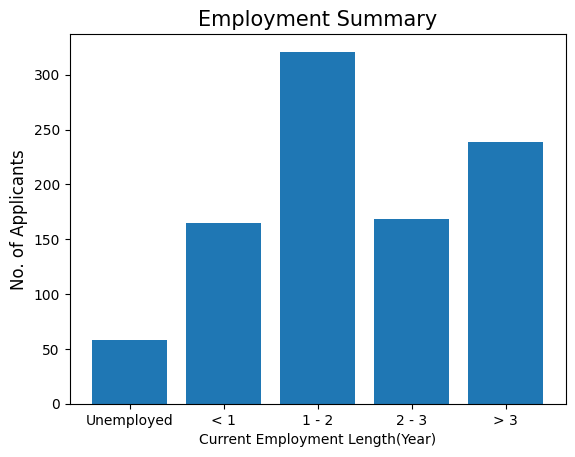

In [15]:
#Employment
data = df["Employment"].value_counts().sort_index()
Employment = ["Unemployed", "< 1","1 - 2", "2 - 3", "> 3"]

xs = Employment
ys = data

plt.bar(xs, ys)
plt.title("Employment Summary", fontsize=15)
plt.xlabel("Current Employment Length(Year)")
plt.ylabel("No. of Applicants", fontsize=12)
plt.show()

**Guarantors**

Most of the applicants have no guarantor or co-applicants when applying for a credit facility. Only a very small number have guarantors or co-applicants

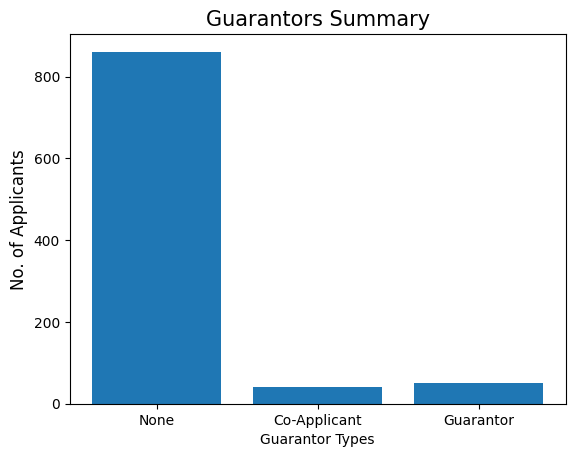

In [16]:
#Guarantors 
data = df["Guarantors"].value_counts().sort_index() 
guarantor_types = ["None", "Co-Applicant", "Guarantor"] 
 
xs = guarantor_types 
ys = data 

plt.bar(xs, ys) 
plt.title("Guarantors Summary", fontsize=15) 
plt.xlabel("Guarantor Types") 
plt.ylabel("No. of Applicants", fontsize=12) 
plt.show()

**Occupation**

Most of the applicants are skilled employees or officials. A very small percentage of applicants are either unskilled or unemployed non-residents.

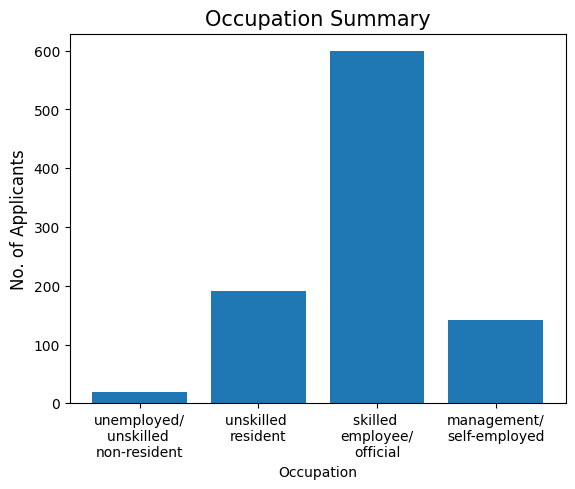

In [17]:
#Occupation
data = df["Occupation"].value_counts().sort_index()
Occupation_Labels = ["unemployed/\nunskilled \nnon-resident", 
                     "unskilled \nresident","skilled \nemployee/\nofficial", "management/\nself-employed"]

xs = Occupation_Labels
ys = data


plt.bar(xs, ys)
plt.title("Occupation Summary", fontsize=15)
plt.xlabel("Occupation")
plt.ylabel("No. of Applicants", fontsize=12)
plt.show()

**Personal Status**

Half of the applicants are either married or widowed males. While about 250 of the applicants are single males. A smaller fraction of the applicants are females and divorced or separated males. 

This graph is not a good indication of the genders applying for credit facility as there is only one category accounting for females while there are 3 categories for males. However the conclusion from this graph is there are more males applying than females.

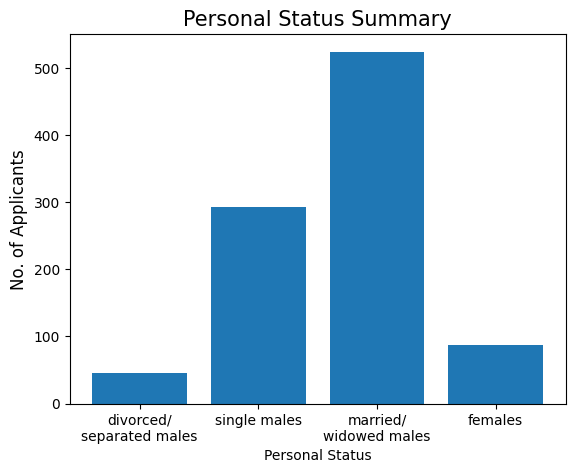

In [18]:
#Personal_Status 
data = df["Personal_Status"].value_counts().sort_index() 
status_types = ["divorced/\nseparated males", "single males", "married/\nwidowed males", "females"] 
 
xs = status_types 
ys = data 

plt.bar(xs, ys) 
plt.title("Personal Status Summary", fontsize=15) 
plt.xlabel("Personal Status", fontsize = 10) 
plt.ylabel("No. of Applicants", fontsize=12) 
plt.show()

**Residence Length**

There are more applicants who have stayed in their residence for more than 3 years. Followed by roughly 250 applicants who have stayed between 1 to 2 years in their current residence. The number of applicants who have stayed less than 1 year or between 2 to 3 years are roughly around 130.

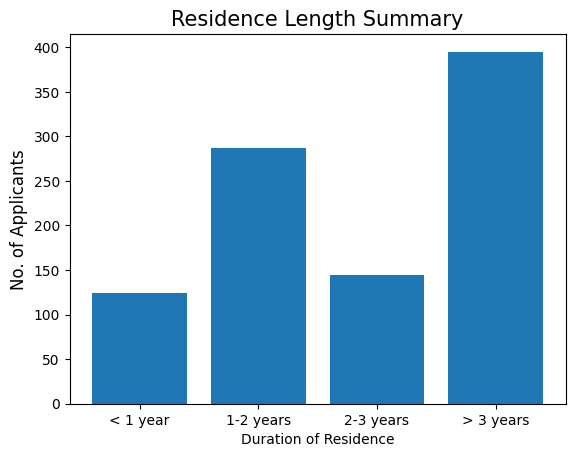

In [19]:
#Residence_Length 
data = df["Residence_Length"].value_counts().sort_index() 
length_types = ["< 1 year", "1-2 years", "2-3 years", "> 3 years"] 

xs = length_types 
ys = data 
plt.bar(xs, ys) 
plt.title("Residence Length Summary", fontsize=15) 
plt.xlabel("Duration of Residence") 
plt.ylabel("No. of Applicants", fontsize=12)
plt.show()

**Existing Credits**

Most of the applicants have no existing credits. While about 100 of them have credits in banks and the remaining are placed in stores.

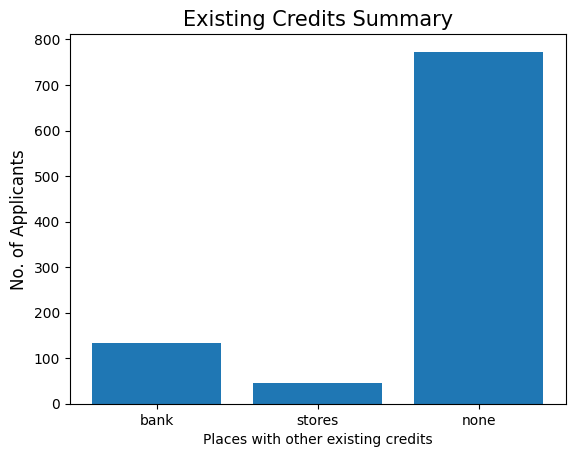

In [20]:
#Existing Credits
data = df["Existing_Credits"].value_counts().sort_index()
Existing_Credits_Labels = ["bank", "stores","none"]

xs = Existing_Credits_Labels
ys = data

plt.bar(xs, ys)
plt.title("Existing Credits Summary", fontsize=15)
plt.xlabel("Places with other existing credits")
plt.ylabel("No. of Applicants", fontsize=12)
plt.show()

**Housing_Type**

More than 600 of the applicants own their own home while about 100 of them lives in rented housing. The rest of the applicants lived in their housing for free.

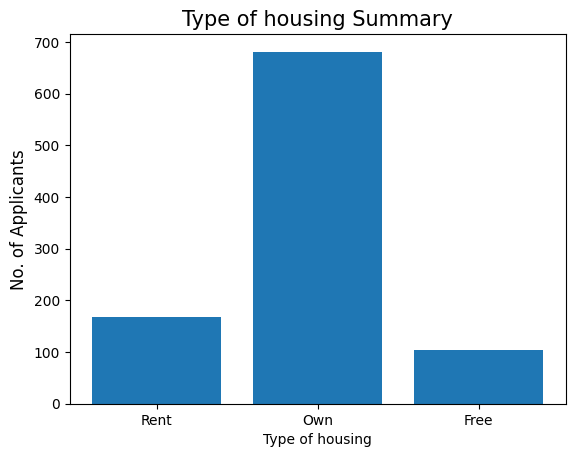

In [21]:
#Housing Type
data = df["Housing_Type"].value_counts().sort_index()
Housing_Type_Labels = ["Rent", "Own","Free"]

xs = Housing_Type_Labels
ys = data

plt.bar(xs, ys)
plt.title("Type of housing Summary", fontsize=15)
plt.xlabel("Type of housing")
plt.ylabel("No. of Applicants", fontsize=12)
plt.show()

**Telephone**

Most of the applicants do not have a telephone while 300 of them have a telephone registered to them

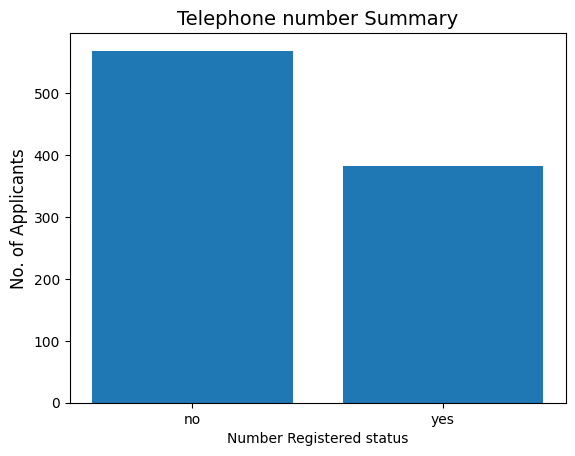

In [22]:
#Telephone
data = df["Telephone"].value_counts().sort_index()
number_registered = ["no", "yes"]

xs = number_registered
ys = data

plt.bar(xs, ys)
plt.title("Telephone number Summary", fontsize=14)
plt.xlabel("Number Registered status")
plt.ylabel("No. of Applicants", fontsize=12)
plt.show()

**Foreign_Worker**

A large majority, close to 800, of the applicants are foreign workers.

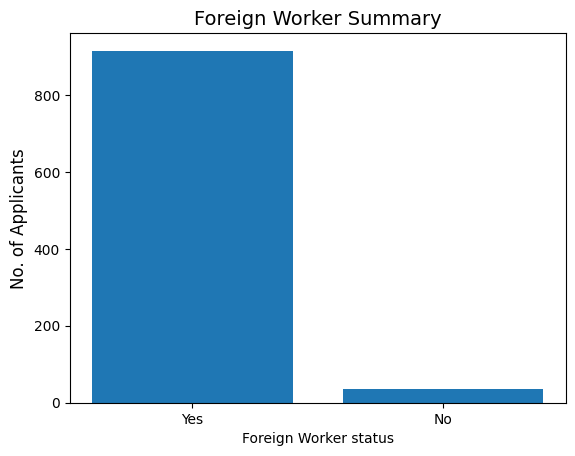

In [23]:
#Foreign Worker
data = df["Foreign_Worker"].value_counts().sort_index()
Foreign_Status = ["Yes", "No"]

xs = Foreign_Status
ys = data

plt.bar(xs, ys)
plt.title("Foreign Worker Summary", fontsize=14)
plt.xlabel("Foreign Worker status")
plt.ylabel("No. of Applicants", fontsize=12)
plt.show()


**Approval**

There are more applicants being approved for their credit facility application than being rejected.

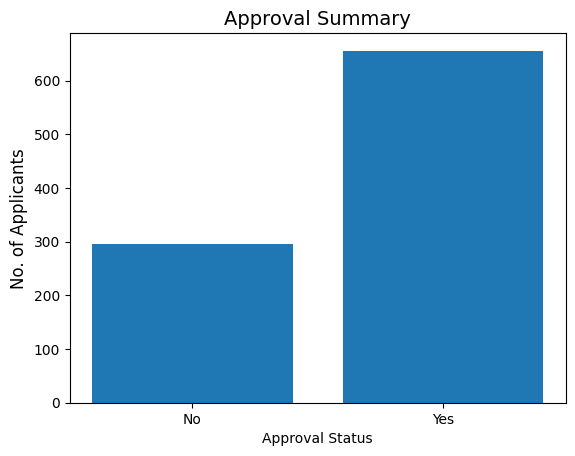

In [24]:
#Approval
data = df["Approval"].value_counts().sort_index()
Approval_Status = ["No", "Yes"]

xs = Approval_Status
ys = data

plt.bar(xs, ys)
plt.title("Approval Summary", fontsize=14)
plt.xlabel("Approval Status")
plt.ylabel("No. of Applicants", fontsize=12)
plt.show()

**Payment_Status**

Most of the applicants are still paying back exisiting credits. While roughly 250 of them have critical accounts.
A smaller number of the applicants have no credits taken, have all credits paid back or have delays in pay off in the past.

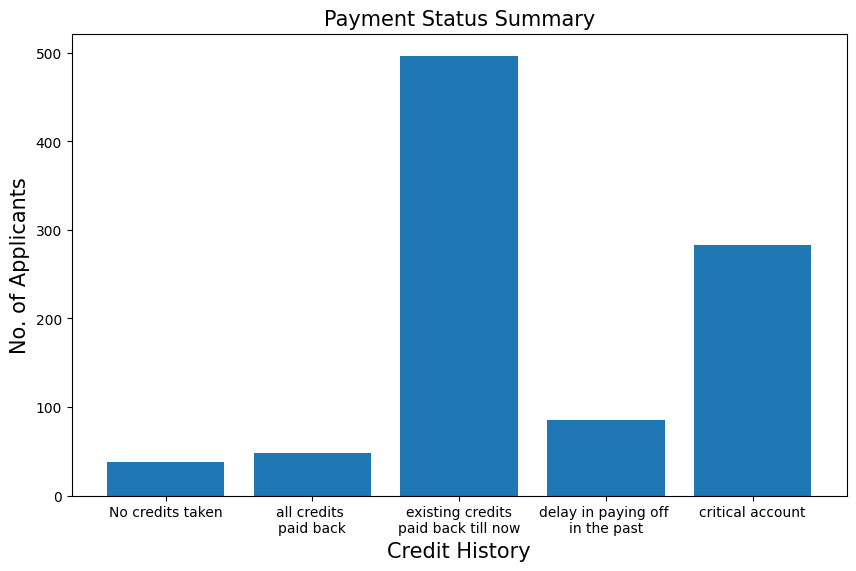

In [25]:
#Payment Status
data = df["Payment_Status"].value_counts().sort_index()
Payment_Status = ["No credits taken", "all credits \npaid back",
                  "existing credits\npaid back till now", "delay in paying off \nin the past", "critical account"]

xs2 = Payment_Status
ys2 = data
plt.figure(figsize=(10, 6))
plt.bar(xs2, ys2)
plt.title("Payment Status Summary", fontsize=15)
plt.xlabel("Credit History", fontsize = 15)
plt.ylabel("No. of Applicants", fontsize=15)

plt.show()

**Purpose**

Most of the applicants purpose of seeking credit facility are for cars, funiture and equipment or others purposes.

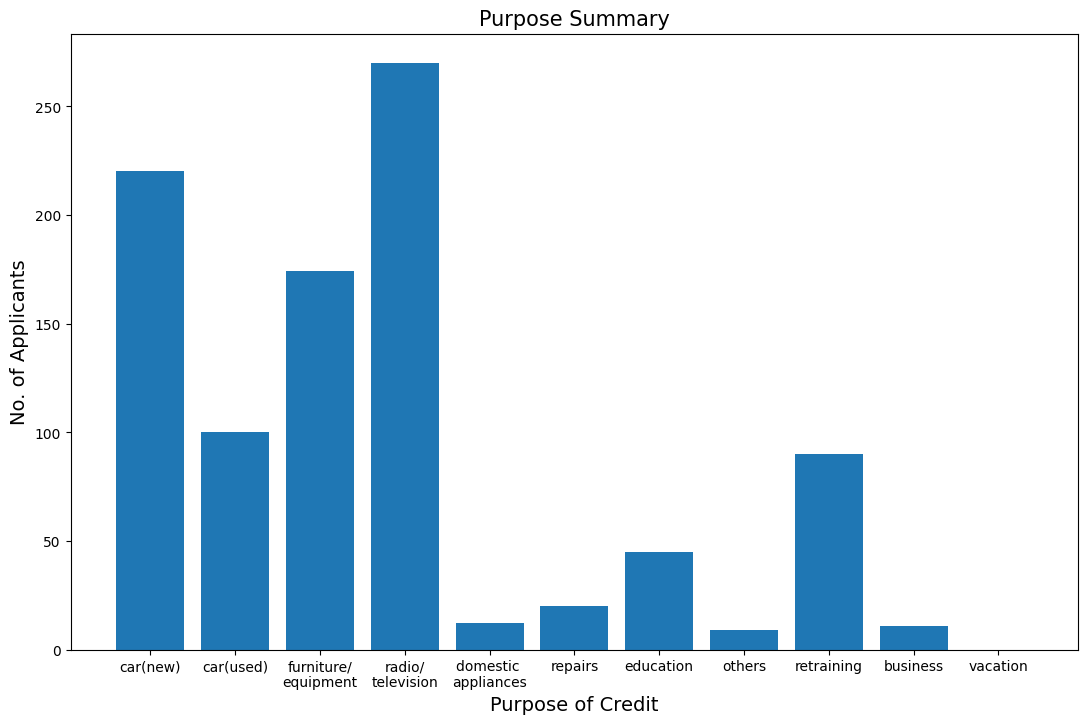

In [26]:
#purpose

data = df["Purpose"].value_counts().sort_index()
data[7] = 0

data.sort_index()
Purpose = ["car(new)", "car(used)", "furniture/\nequipment", 
                  "radio/\ntelevision", "domestic \nappliances", 
                  "repairs", "education", "others", "retraining", "business","vacation"]

xs2 = Purpose
ys2 = data
plt.figure(figsize=(13, 8))
plt.bar(xs2, ys2)
plt.title("Purpose Summary", fontsize=15)
plt.xlabel("Purpose of Credit", fontsize=14)
plt.ylabel("No. of Applicants", fontsize=14)
plt.show()

**Assets**

Roughly 260 of the applicants have assets in car or other. Around 250 of them have assets in real estate while 200 have assets in savings agreement or life insurance. The remaining of applicants did not provide information on their assets or had none.

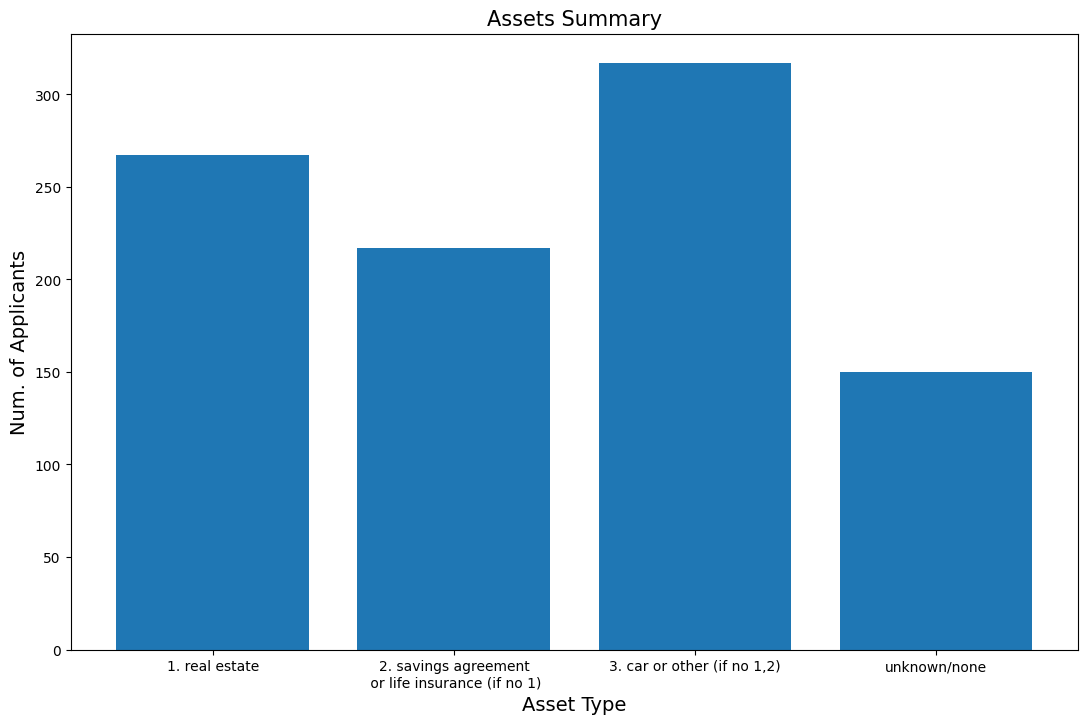

In [27]:
#Assets 
data = df["Assets"].value_counts().sort_index()  
asset_types = ["1. real estate", "2. savings agreement\n or life insurance (if no 1)", 
               "3. car or other (if no 1,2)", "unknown/none"]  
  
xs = asset_types  
ys = data  
plt.figure(figsize=(13, 8))
plt.bar(xs, ys)  
plt.title("Assets Summary", fontsize=15)  
plt.xlabel("Asset Type", fontsize = 14)  
plt.ylabel("Num. of Applicants", fontsize=14)
plt.show()

**Duration**


A large proportion of individuals have a credit duration of 12 months and 24 months. The next substantial proportion of credit duration lie between 0 to 24 months (inclusive), while there is a relatively smaller proportion that is greater than 24 months. Above 24 months, there is a notable proportion of individuals with credit duration of 36 months.

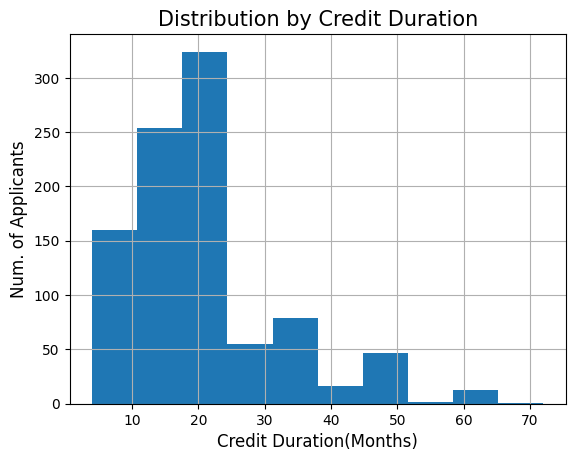

In [28]:
#Duration
plt.title("Distribution by Credit Duration", fontsize=15)
plt.xlabel("Credit Duration(Months)", fontsize=12)
plt.ylabel("Num. of Applicants", fontsize=12)
df["Duration"].hist(bins=10)
plt.show()

**Credit Amount**

Majority of the distribution lies between 1000 to 4000, with the highest proportion of individuals having credit amount between 1000 to 2000. This is followed by a decreasing trend of number of individuals as the credit amount increases.

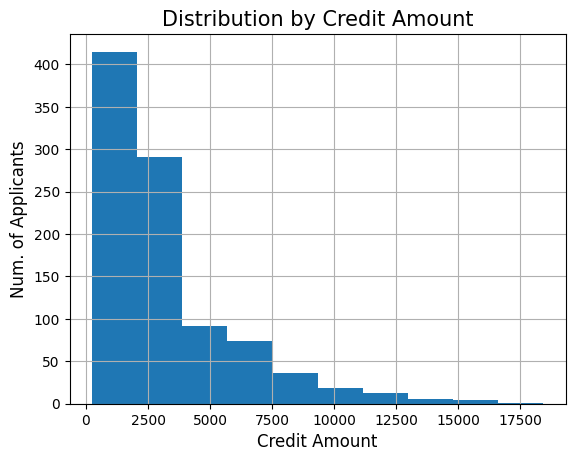

In [29]:
plt.title("Distribution by Credit Amount", fontsize=15)
plt.xlabel("Credit Amount", fontsize=12)
plt.ylabel("Num. of Applicants", fontsize=12)
df["Amount"].hist(bins=10) 
plt.show()

**Installment**

The installment rate with the largest proportion of individuals is 4%, with the proportion being almost double of the proportion that has 2% installment rate, and about 3 times the proportion that has 3% installment rate, and almost 4 times the proportion that has 1% installment rate.

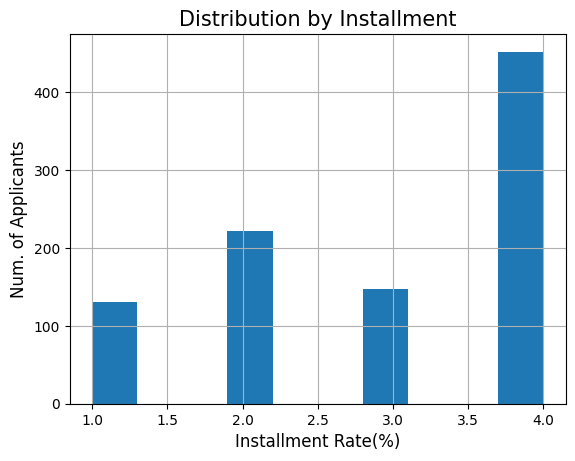

In [30]:
plt.title("Distribution by Installment", fontsize=15)
plt.xlabel("Installment Rate(%)", fontsize=12)
plt.ylabel("Num. of Applicants", fontsize=12)
df["Installment"].hist(bins=10) 
plt.show()

**Age**

Majority of the participants are aged 25 to 30 years old, and there is a decreasing trend in distribution of the number of participants as the age increases.

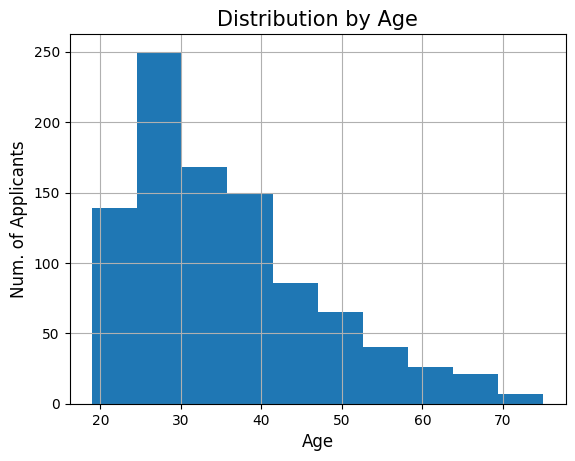

In [31]:
plt.title("Distribution by Age", fontsize=15) 
plt.xlabel("Age", fontsize=12) 
plt.ylabel("Num. of Applicants", fontsize=12) 
df["Age"].hist(bins=10)
plt.show()

**Credit Rating**

Most of the participants have a credit rating between 90 and 100, while the number of participants having credit rating less than 80 is relatively evenly distributed across the range, with a slightly larger proportion having credit rating between 0 to 10.

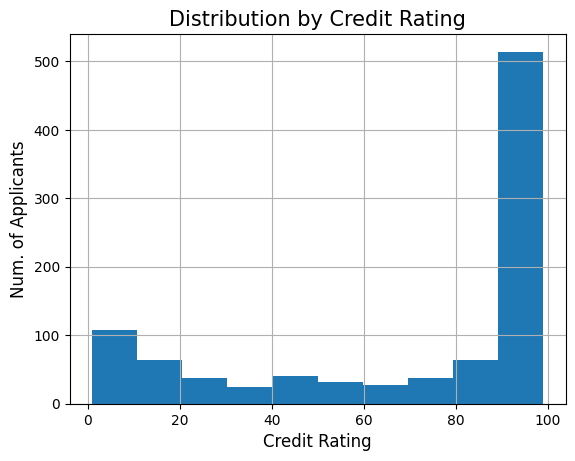

In [32]:
#Credit_Rating 
plt.title("Distribution by Credit Rating", fontsize=15) 
plt.xlabel("Credit Rating", fontsize=12) 
plt.ylabel("Num. of Applicants", fontsize=12) 
df["Credit_Rating"].hist(bins=10)
plt.show()

**Number of Credits**

Majority of the participants have 1 existing credit and the proportion is about double of the number of participants having 2 existing credits. There is a significantly smaller proportion of participants having 3 existing credits and 4 existing credits.

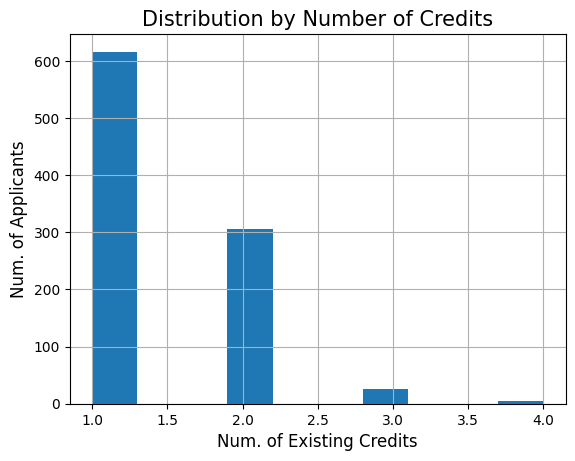

In [33]:
#Num_Credits
plt.title("Distribution by Number of Credits", fontsize=15)
plt.xlabel("Num. of Existing Credits", fontsize=12)
plt.ylabel("Num. of Applicants", fontsize=12)
df["Num_Credits"].hist(bins=10) 
plt.show()

**Dependents**

Majority of the individuals have 1 dependent, while a significantly smaller proportion of individuals have 2 dependents, with the proportion being close to about 1/5 of the proportion of the majority.

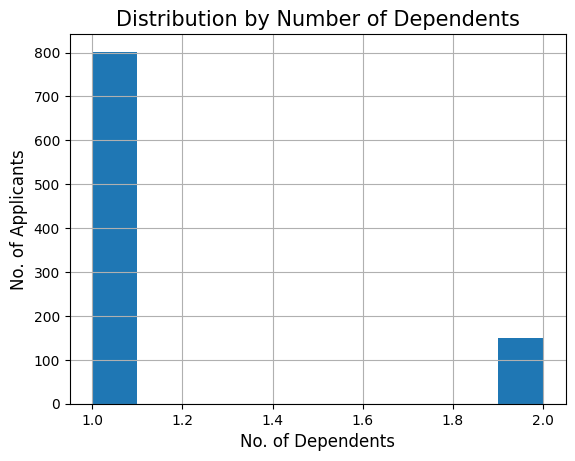

In [34]:
#Dependents
plt.title("Distribution by Number of Dependents", fontsize=15)
plt.xlabel("No. of Dependents", fontsize=12)
plt.ylabel("No. of Applicants", fontsize=12)
df["Dependents"].hist(bins=10)    
plt.show()

Key observations:
    
    Majority of the people applying for credit loans:    
        1. are males, where most are married/widowed.        
        2. have no existing credit in place with neither the bank nor stores.
        3. working skilled/official type occupations.        
        4. range from age 20 to 40.
        5. Have either no checking accounts or less than 200 in them.        
        6. having withstanding credits during the time of their application.
        7. having stayed in their current residence for more than 3 years.
        
    Most of the loans:    
        1. purpose are to purchase televisions/radios, furnitures and cars(old/new).        
        2. are backed by no guarantors.
        3. have durations lasting more than 20 months.        
        4. are for amounts less than $5000.
        
There are more foreign workers requesting for credit loan than local workers.

There are more applicants with good credit rating than bad credit ratings.

There are more home owners requesting for loans than non-home owners.

There are around 65% approval of credit loans.

Around 80% of the applicants have no existing credits in neither banks nor stores, but there are around 50% of the applicants with 4 existing credit.

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response:** 

### Context
**Focus on approval:**
In general, banks have strict lending standards that borrowers must meet to be approved for loans. Hence, We decided to explore more than just one variable effecting the approvability of any credit facility request to show a more detailed look at how various factor effect the creditworthiness of an applicant.

### 1: Age vs Approval bivariate analysis

**Preconception:** 
For the first variable, we decided on `Age`, comparing it with `Approval`.

There is a general trend that as people get older, they are more likely to have their loan applications approved. This is because older individuals tend to have more established credit histories and may have more assets, such as a home or retirement savings, that they can use as collateral. Additionally, older individuals may have more stable incomes and be less likely to default on a loan.

Between `Age` and `Approval`, we expect a **positive** trend to form in **proportion** to the requestor's age due to the assumed financial intelligence and stability that follows. Based on this assumption, the older the requestor, the more likely they will have their loans approved. 

In order to investigate this relationship, we created box plot of `Age` against `Approval` to depict key information on the average requestor's approval and disapproval numbers.

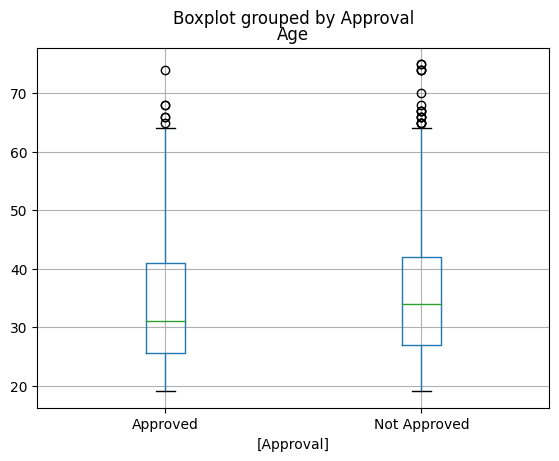

In [35]:
df[['Age','Approval']].boxplot(by='Approval')
plt.xticks([1, 2], ['Approved', 'Not Approved'])
plt.show()

Based on this box plot, majority of the applicants are young adults ranging from 25 to 35 years old. As such, we decided to further investigate by segmenting the data into various age group and creating a bar plot. Two crosstab tables are created to depict percentage of approved/ not approved for each age group.



'Age vs Approval (Not Normalised)'

Approval,Approved,Not Approved
Age,,
below 25,80,59
between 25 and 35,286,132
between 35 and 45,163,55
between 45 and 55,78,29
between 55 and 65,36,15
between 65 and 75,13,5


'Age vs Approval (Normalised)'

Approval,Approved,Not Approved
Age,,
below 25,0.575540,0.424460
between 25 and 35,0.684211,0.315789
between 35 and 45,0.747706,0.252294
between 45 and 55,0.728972,0.271028
between 55 and 65,0.705882,0.294118
between 65 and 75,0.722222,0.277778


<AxesSubplot: xlabel='Age'>

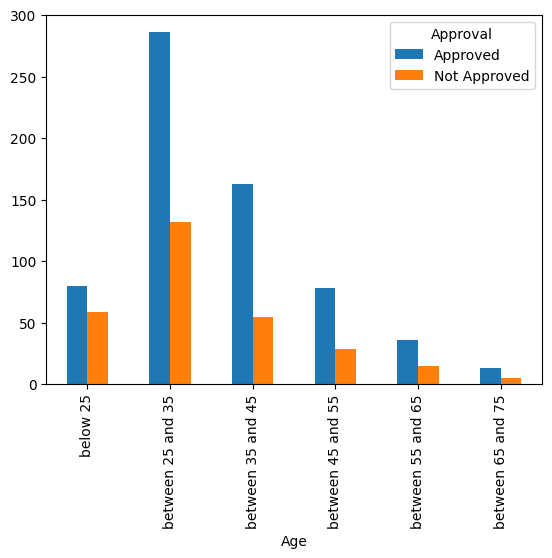

In [36]:
def approval_class(n):
    if n == 1:
        return "Approved"
    elif n == 0:
        return "Not Approved"
    
def age_class(n):
    if n > 75:
        return "more than 75"
    elif n > 65:
        return "between 65 and 75"
    elif n > 55:
        return "between 55 and 65"
    elif n > 45:
        return "between 45 and 55"
    elif n > 35:
        return "between 35 and 45"
    elif n >= 25:
        return "between 25 and 35"
    elif n < 25:
        return "below 25"
    
new_df = df.Approval.apply(approval_class)
age_df = df.Age.apply(age_class)
notNormalised = pd.crosstab(age_df,new_df)
Normalised = pd.crosstab(age_df,new_df, normalize="index")
display("Age vs Approval (Not Normalised)")
display(notNormalised)
display("Age vs Approval (Normalised)")
display(Normalised)
pd.crosstab(age_df, new_df).plot.bar(stacked=False)

#### Conclusion (Age vs Approval):

Based on the stack bar plot and box plot above, most of the applicants comprise of people between the <ins>ages of 25 to 45</ins>. Furthermore, the rate of approval increases as the age of the applicant increases. From an approval of **0.575540** for those aged 25 and below to **0.747706** for those aged 35 - 45. 

As mentioned earlier in our analysis of the box plot, younger requestors are more likely to take up credit facilities, but have a lower chance of approval as compared to older requestors base on the bar plot. This supports our preconception that the chance of approval increases with requestor's age.

However, above the age of 45, the approval rate seemed to stagnate around **0.70 - 0.72**. Which suggests that it will require more than just requestor age to determine their approvability by the bank.

### 2: Employment vs Approval bivariate analysis

**Preconception:** 
For the second variable, we decided on `Employment`, comparing it with `Approval`.

Between `Employment` and `Approval` , we expected a **positive** trend to form in **proportion** to the tenure of one's occupation, with tenure length and steadiness of income flow being very synonymous. As such, the longer a requestor's tenure for a certain job is, the more likely they would have their loans approved. The **inverse** should remain true as well.

This would be logical as in general, banks prefer borrowers who have stable employment histories and have been working in their current jobs for a significant amount of time. This is because borrowers who have been employed for longer periods of time are considered to be more financially stable and less risky to lend to. Therefore, having a longer tenure or employment history can increase the likelihood of getting a loan approved.

In order to investigate this relationship, we created a bar plot of `Employment` against `Approval`, alongside two crosstab tables to depict the amount and percentage of any one type of requestor's approval and disapproval numbers.

Occupation vs Approval (Not Normalised)


Approval,Approved,Not Approved
Employment,,
A: Unemployed,37,21
B: < 1 Year,96,69
C: 1 - 4 Years,220,101
D: 4 - 7 Years,133,35


Occupation vs Approval (Normalised)


Approval,Approved,Not Approved
Employment,,
A: Unemployed,0.637931,0.362069
B: < 1 Year,0.581818,0.418182
C: 1 - 4 Years,0.685358,0.314642
D: 4 - 7 Years,0.791667,0.208333


<AxesSubplot: xlabel='Employment'>

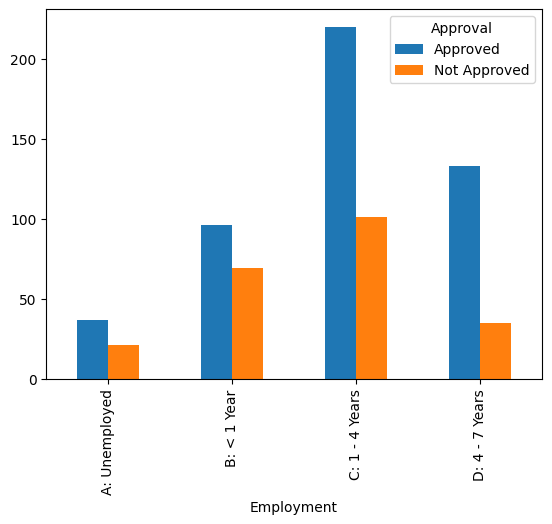

In [37]:
def Employment_class(n):
    if n == 1: 
        return "A: Unemployed"
    elif n == 2:
        return "B: < 1 Year"
    elif n == 3:
        return "C: 1 - 4 Years"
    elif n == 4:
        return "D: 4 - 7 Years"
    elif n == 4:
        return "E: > 7 Years"
    
new_df = df.Approval.apply(approval_class)
employment_df = df.Employment.apply(Employment_class)
notNormalised = pd.crosstab(employment_df,new_df)
Normalised = pd.crosstab(employment_df,new_df, normalize="index")
print("Occupation vs Approval (Not Normalised)")
display(notNormalised)
print("Occupation vs Approval (Normalised)")
display(Normalised)
pd.crosstab(employment_df, new_df).plot.bar(stacked=False)

#### Conclusion (Employment vs Approval):
Based on the bar plot above, the distribution of employment is consistent for both loans that were approved and loans that were not approved. It can be seen that individuals with greater tenure experience higher approval rates, with those having 1 to 4 years tenure, 4 to 7 years tenure having higher approval ratios of **0.685358 : 0.314642** and **0.791667 : 0.314642** respectively. This trend is consistent with those having lower employment tenure, as those with employment tenure of less than 1 year or are unemployed have lower approval rates with approval ratios of **0.637931 : 0.418182** and **0.581818 : 0.418182** respectively.

As such, the trends assumed in the preconception seem to hold, but credit facilities would require more than just employment tenure of requestors to determine their approvability by the bank.

### 3: Occupation vs Approval bivariate analysis

**Preconception:** 
For the third variable, we decided on `Occupation`, comparing it with `Approval`.

Between `Occupation` and `Approval`, we expected a **positive** trend to form in **proportion** to the skill and stability of one's occupation status. As such, the higher level the skill required by the requestor's occupation, the more likely they would have their loans approved, while the **inverse** would be true as well.

This would be logical as banks would more likely lend to people who have the capacity and capability to return their loan amounts and accompanying interests with ease. A requestor's occupation can help to determine the purchasing power of an individual, as the higher level the skill required by an occupation, the higher the salary would usually be, and therefore the greater the individual's earning power.

Conversely, if a requestor is unemployed or working odd jobs, it is unlikely that he or she has the earning capacity to punctually repay what they owe, with those unemployed being the most likely to default on their facility payments.

In order to investigate this relationship, we created a bar plot of `Occupation` against `Approval`, alongside two crosstab tables to depict the amount and percentage of any one type of requestor's approval and disapproval numbers.

Occupation vs Approval (Not Normalised)


Approval,Approved,Not Approved
Occupation,,
1. Unemployed/unskilled -non resident,15,5
2. Unskilled - resident,135,56
3. Skilled employee/ official,414,185
4. Management/ self-employed,92,49


Occupation vs Approval (Normalised)


Approval,Approved,Not Approved
Occupation,,
1. Unemployed/unskilled -non resident,0.750000,0.250000
2. Unskilled - resident,0.706806,0.293194
3. Skilled employee/ official,0.691152,0.308848
4. Management/ self-employed,0.652482,0.347518


<AxesSubplot: xlabel='Occupation'>

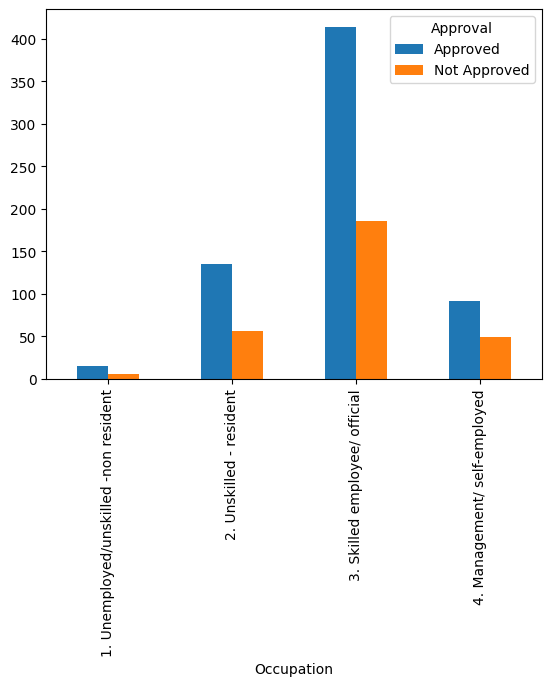

In [38]:
 
def occupation_class(n):
    if n == 1: 
        return "1. Unemployed/unskilled -non resident"
    elif n == 2:
        return "2. Unskilled - resident"
    elif n == 3:
        return "3. Skilled employee/ official"
    elif n == 4:
        return "4. Management/ self-employed"
    
new_df = df.Approval.apply(approval_class)
occupation_df = df.Occupation.apply(occupation_class)
notNormalised = pd.crosstab(occupation_df, new_df)
Normalised = pd.crosstab(occupation_df, new_df, normalize="index")
print("Occupation vs Approval (Not Normalised)")
display(notNormalised)
print("Occupation vs Approval (Normalised)")
display(Normalised)
pd.crosstab(occupation_df, new_df).plot.bar(stacked=False)

#### Conclusion (Occupation vs Approval):
Based on the bar plot above, the distribution of occupation is consistent for both loans that were approved and loans that were not approved, with people from different occupations facing similar approval and disapproval probabilities as approval probabilities hover around **0.652482 to 0.750000**. However, the samples size for unemployed/unskilled non residents was too small. Which might lead to inaccurate results such as the category having the highest approval ratio of 0.75 : 0.25

This runs against our preconception, where we expected a positive trend to form in proportion to the skill and stability of one's occupation status. In other words, occupation type is not a good indicator of credit facility approval. Although in theory, the skilled employees and officials should more likely have their loans approved, the data have demonstrated that banks are equally likely to approve or disapprove a loan from an unskilled/unemployed requestor and a skilled requestor.

### 4: Payment Status vs Approval bivariate analysis

**Preconception:** 
For the fourth variable, we decided on `Payment Status`, comparing it with `Approval`.

Between `Payment Status` and `Approval`, we expected a **negative** trend to form in **proportion** to the amount of withstanding credit that a requestor has. As such, the more unpaid or overdue credits a requestor has, the more likely such requestors would have their loans disapproved. 

In general, having a good credit history can increase the chances for a requestor's loan to be approved. A good credit history demonstrates that a borrower has a track record of paying their debts on time and in full, which can give lenders' confidence that the requestor is likely to repay the loan. On the other hand, a poor credit history showing records of missed or late payments will decrease lenders' confidence, and hence makes it more difficult for a borrower to be approved for a loan, or can result in higher interest rates or fees.

In order to investigate this relationship, we created a bar plot of `Payment Status` against `Approval`, alongside two crosstab tables to clearly depict amount and percentage of any one type of requestor's approval and disapproval numbers.

Occupation vs Approval (Not Normalised)


Approval,Approved,Not Approved
Payment_Status,,
0: No credits taken,13,25
1: All credits paid back,19,29
2: Existing credits paid back till now,337,160
3: Delay in paying off in the past,58,27
4: Critical account,229,54


Occupation vs Approval (Normalised)


Approval,Approved,Not Approved
Payment_Status,,
0: No credits taken,0.342105,0.657895
1: All credits paid back,0.395833,0.604167
2: Existing credits paid back till now,0.678068,0.321932
3: Delay in paying off in the past,0.682353,0.317647
4: Critical account,0.809187,0.190813


<AxesSubplot: xlabel='Payment_Status'>

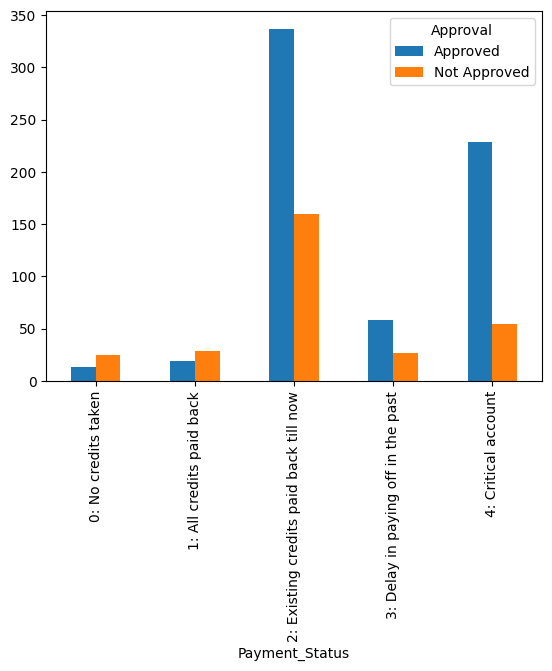

In [39]:
def Payment_Status_class(n):
    if n == 0: 
        return "0: No credits taken"
    elif n == 1: 
        return "1: All credits paid back"
    elif n == 2:
        return "2: Existing credits paid back till now"
    elif n == 3:
        return "3: Delay in paying off in the past"
    elif n == 4:
        return "4: Critical account"
    
new_df = df.Approval.apply(approval_class)
Payment_Status_df = df.Payment_Status.apply(Payment_Status_class)

notNormalised = pd.crosstab(Payment_Status_df, new_df)
Normalised = pd.crosstab(Payment_Status_df,new_df, normalize="index")
print("Occupation vs Approval (Not Normalised)")
display(notNormalised)
print("Occupation vs Approval (Normalised)")
display(Normalised)

pd.crosstab(Payment_Status_df,new_df).plot.bar(stacked=False)

#### Conclusion (Payment Status vs Approval):
Based on the bar plot above, the distribution of payment status is inconsistent for both loans that were approved and loans that were not approved, and shows an inverse relationship with the quality of one's credit history. It can be observed that applicants who took no credits or have paid back all credits have lower approval ratios compared those who delay in paying past credits and those with a critical account. 

Based on the cross tab tables, an inverse trend can be seen where accounts with greater risk have a higher proportion of approved credit facilities compared to their counterparts with lower risk, where applicants with no credits have an approval probability of **0.342105**, while applicants with critical accounts have an approval probability of **0.809187**.

It is known that banks take on risky loans because they can potentially earn higher returns compared to taking on safer loans, due to a higher interest rate charge on the borrower. With risky loans that have a higher likelihood of default, banks can charge a higher interest rate to compensate for the increased risk.

In other words, it can be seen that the bank has a substantial risk portolio, and hence this shows that payment status is a bad indicator of credit facility approval.

### 5: Credit Rating  vs Approval bivariate analysis

**Preconception:** 
For the fifth variable, we decided on `Credit Rating`, comparing it with `Approval`.

Between `Credit Rating` and `Approval`, we expected a **positive** trend to form in **proportion** to one's credit rating with the bank. As such, the higher the credit rating a requestor has with the bank, the more likely such requestors would have their loans approved. 

In general, credit ratings are used by lenders to assess the creditworthiness of a borrower, and hence plays a significant role in the approval process.

Naturally, individuals with higher credit scores are generally more likely to be approved for credit applications, as they are seen as less risky borrowers. Lenders view individuals with high credit scores as responsible borrowers who are more likely to repay their debts on time. Conversely, individuals with lower credit scores are often seen as riskier borrowers who are more likely to delay or default on their repayments, hence they may be denied credit or approved for credit with higher interest rates or on stricter terms.

In order to investigate this relationship, we created a a violin stripplot of `Credit Rating` against `Approval`, alongside a box plot to clearly depict the amount of associated with the requestor's loan approval and disapproval.

<AxesSubplot: xlabel='Approval', ylabel='Credit_Rating'>

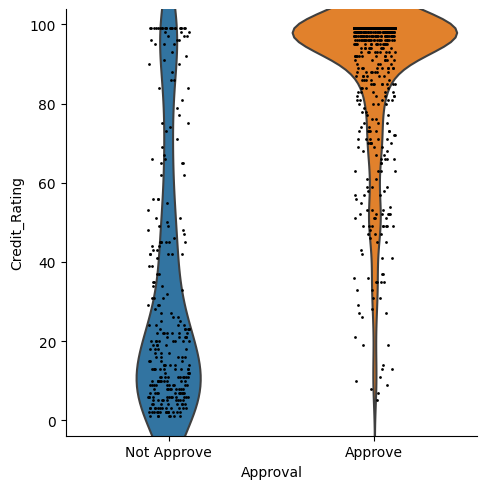

In [40]:
g = sns.catplot(data=df, x="Approval", y="Credit_Rating", kind="violin", inner=None)

x = sns.stripplot(data=df, x="Approval", y="Credit_Rating", color="black", size=2, ax=g.ax)

x.set_xticks([0,1], ["Not Approve","Approve"])
x

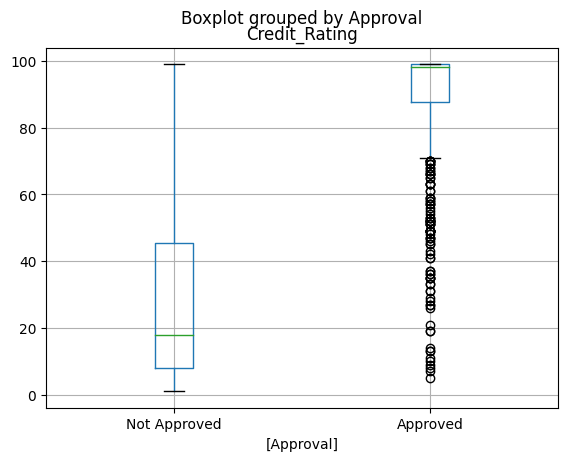

In [41]:
df[['Credit_Rating','Approval']].boxplot(by='Approval')
plt.xticks([1, 2], ['Not Approved','Approved'])
plt.show()

#### Conclusion (Credit Rating vs Approval):
Based on the box plot and violin stripplot above, the distribution of credit_rating is consistent in determining loan approval. It can observed that the those with higher credit ratings stand a greater chance in getting their loans approved, with a few exceptions. The inverse of this is also true.

The box plot further showed that the median credit rating needed for approval is vastly different from the median credit rating for disapproval. The IQR range of Q1 to Q3 of approved loans is also much higher than the IQR range of Q1 to Q3 of disapproved loan. These all show that on average, requestors with higher credit ratings are more likely to have their credit facilities approved. Hence, the trend stated in our preconception holds.

### 6:  Existing Credits vs Credit Rating bivariate analysis

**Focus on Credit Rating:**
Our previous bivariate analysis on credit approval shows that the spectrum of factors have varying degrees of influence. Nonetheless, our results clearly show that Credit Rating is the most important factor. It acts as an accurate proxy for a person's credibility and capability to repay a loan, and lenders frequently use it to assess possible credit risk when evaluating loan applications.

**Preconception:** 
Subsequently, we decided on `Existing Credit`, comparing it with `Credit Rating`.

Between `Existing Credit` and `Credit Rating`, our hypothesis was predicated on a **positive** trend between the two variables, which we anticipated to be characterised by a **disproportionate** impact on credit rating in comparison to existing credit. Moreover, we believed that lower levels of existing credit would be associated with higher credit ratings.

In general, having several outstanding lines of credit may make it difficult for applicants to make regular payments, which may damage lenders' faith in their capacity to repay.

In order to investigate this relationship, we created a violin stripplot of `Existing Credit` plotted against `Credit Rating` to test this theory, along with a box plot to clearly show the correlation between these variables and the approval or denial of loan requests.

<AxesSubplot: xlabel='Existing_Credits', ylabel='Credit_Rating'>

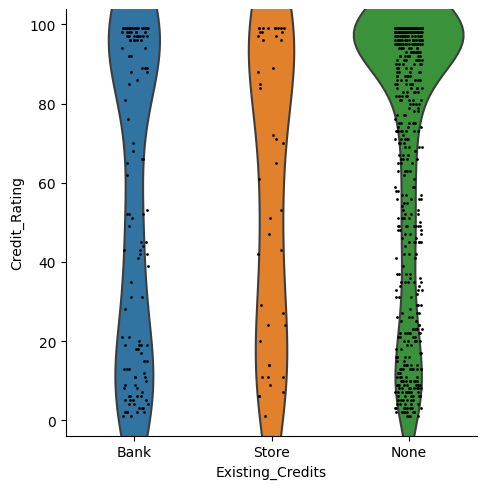

In [42]:
g = sns.catplot(data=df, x="Existing_Credits", y="Credit_Rating", kind="violin", inner=None)

x = sns.stripplot(data=df, x="Existing_Credits", y="Credit_Rating", color="black", size=2, ax=g.ax)
x.set_xticks([0,1,2], ["Bank","Store", "None"])
x

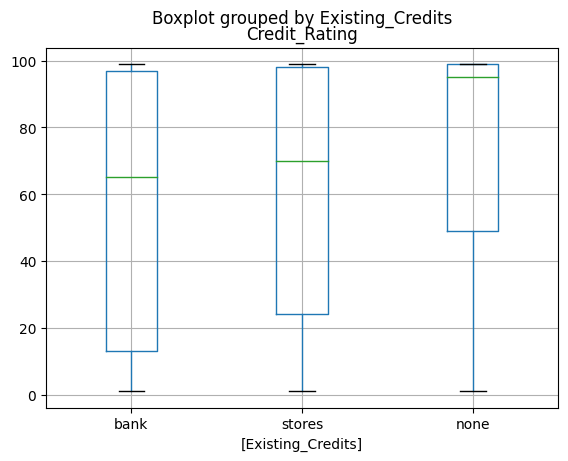

In [43]:
df[['Credit_Rating','Existing_Credits']].boxplot(by='Existing_Credits')
plt.xticks([1.0, 2.0, 3.0], ['bank', 'stores', 'none'])
plt.show()

#### Conclusion (Existing Credits vs Credit Rating):

The evaluations of the box plot and violin strip plot above, shows that credit rating is a reliable indicator of creditworthiness. Particularly, it is clear that, across all lending entities, people with no credit history have credit ratings that are higher than those who do.

This finding is in line with the box plot's median credit rating values, which support the results of the strip plot. It's noteworthy that the interquartile range (IQR) from Q1 to Q3 also shows that applicants without existing credit have credit ratings more closely concentrated towards the higher end of the rating spectrum than are applicants with existing credits.

The agreement between these empirical findings and our anticipated theories attests to the accuracy of our initial hypothesis.

### Correlation matrix

<AxesSubplot: >

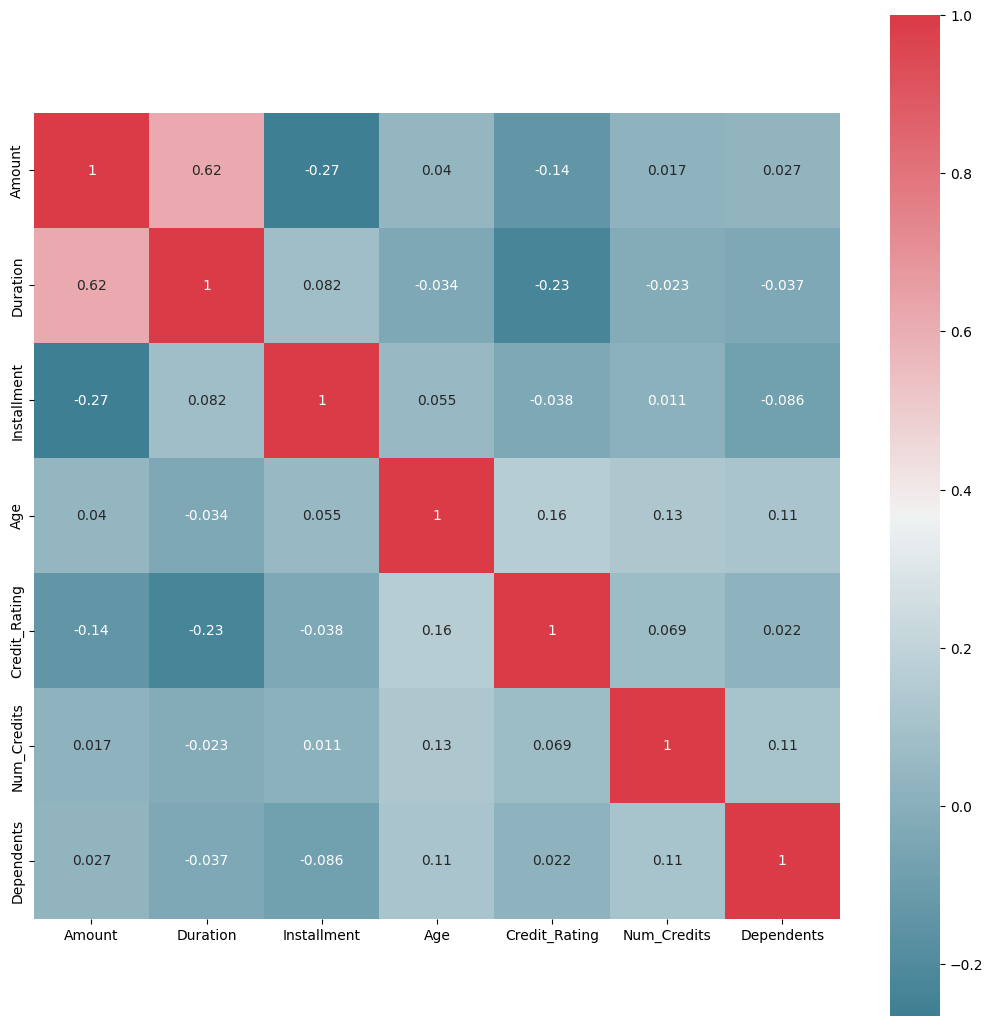

In [44]:
#this code generates the correlation matrix for each variable
f, ax = plt.subplots(figsize=(13,13))

#this code only have numerical variable from the DataFrame to be compared, since only numerical variable can be used to compute the correlation matrix
df_comparison = df[['Amount', 'Duration','Installment','Age','Credit_Rating','Num_Credits','Dependents']]
#this code gets the correlation coefficients for all the variables 
corr = df_comparison.corr()

#this code generates the heatmap of the correlation coefficient
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

Based on the above correlation matrix, the only pair that has a correlation above 0.3 is Duration and Amount. As this pair has a weak to moderate correlation, we decided to further analyse this pair.

### 7:  Duration vs Amount bivariate analysis

**Preconception:** 
Amongst all our numeric variables, we decided on comparing `Duration` with `Amount` due to its perceived correlation.

The variables `Duration` and `Amount` have been found to be **positively correlated**, suggesting that as loan amounts rise, loan duration also tend to rise. This tendency can be related to the cautious lending policies of financial institutions, which seek to reduce the risk of default by allowing borrowers a longer period of time to repay high-value loans.

We created a scatter plot of `Duration` plotted against `Amount` to investigate this correlation, and then calculated the correlation coefficient in the manner shown below.

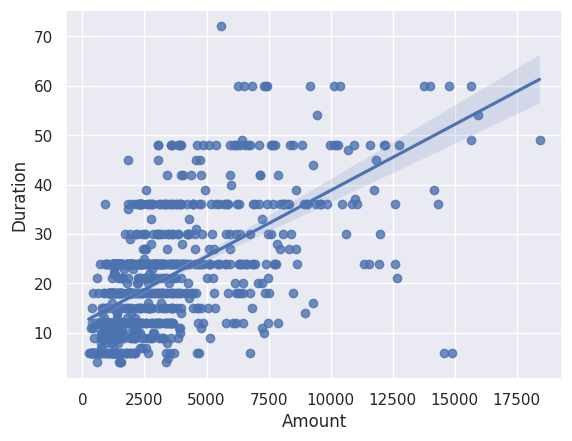

In [45]:
sns.set_theme(color_codes=True)
ax = sns.regplot( x = "Amount", y ="Duration", data = df)
plt.show()

In [46]:
corr = np.corrcoef(df.Duration, df.Amount)
corr

array([[1.        , 0.61760434],
       [0.61760434, 1.        ]])

In [47]:
cov = np.cov(df.Amount, df.Duration)
cov

array([[7.61376502e+06, 2.03346881e+04],
       [2.03346881e+04, 1.42381931e+02]])

#### Conclusion (Duration vs Amount):

A **moderately positive linear relationship** between the variables `Duration` and `Amount` is revealed by the scatter plot analysis. The **0.61760434** correlation coefficient between the two variables suggests a moderate correlation, demonstrating that while loan amount frequently affects loan duration, other factors also affect the length of credit facilities.

The duration of a credit facility cannot be fully determined by the credit amount alone, despite the fact that our preconceived notions are accurate.

### 8:  Duration vs Amount vs Approval multivariate analysis

**Preconception**: Upon conducting bivariate analysis of `Duration` with `Amount`, we sought to investigate the interaction of these variables with `Approval`. Our aim was to assess whether loan approval likelihood was influenced by the duration and amount of a credit facility.

Our findings revealed a **positive correlation** between `Duration`, `Amount`, and `Approval`, suggesting that as loan amounts and durations **increase**, the **greater** the likelihood of loan approval. Lenders consider both loan amount and duration in their approval decisions, as a borrower requesting a high loan amount and short duration may be deemed high-risk, while a borrower seeking a smaller loan amount and longer duration may be viewed as low-risk.

To further explore this relationship, we generated scatter plots of `Duration` against `Amount` and `Duration` against `Approval`.

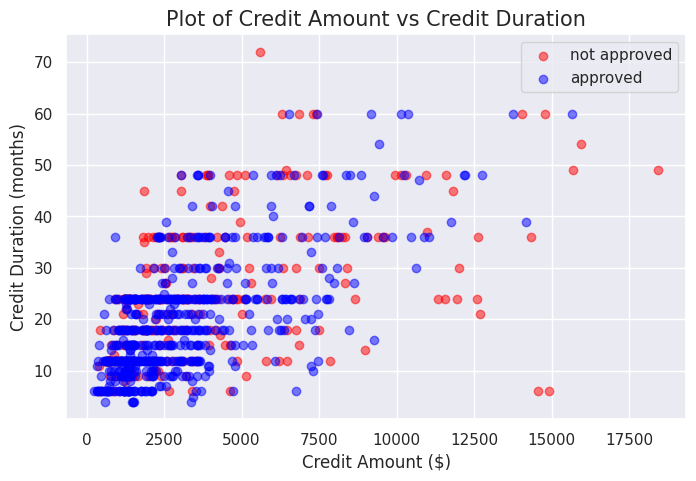

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(df[df.Approval == 0].Amount, df[df.Approval==0].Duration, c='red', label='not approved', alpha=0.5)
plt.scatter(df[df.Approval==1].Amount, df[df.Approval==1].Duration, c='blue', label='approved', alpha=0.5)
plt.title("Plot of Credit Amount vs Credit Duration", fontsize=15)
plt.xlabel("Credit Amount ($)", fontsize=12)
plt.ylabel("Credit Duration (months)", fontsize=12)
plt.legend()
plt.show()

In order to better investigate the areas of concentration within the scatterplot, we had seperated the above plot into two scatterplots, differentiated by their approval.

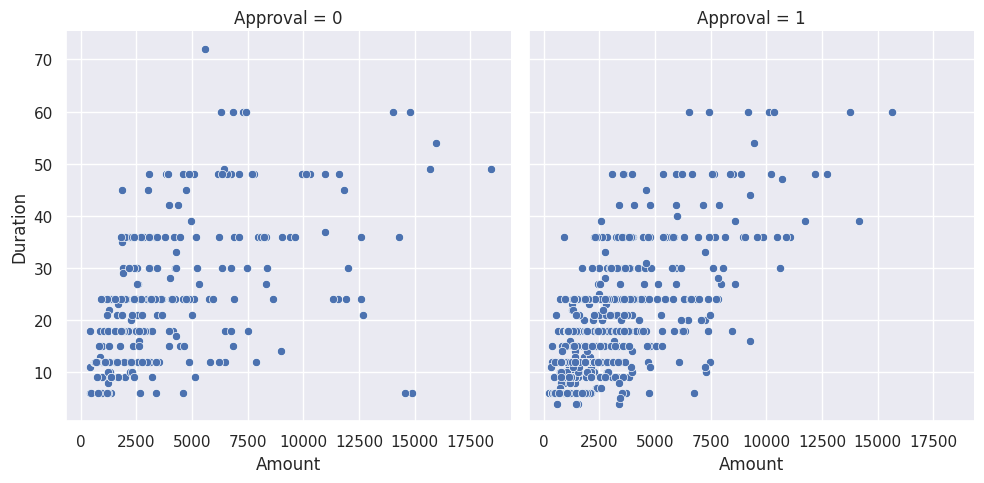

In [49]:
sns.set_theme(color_codes=False)
ax = sns.relplot( x = "Amount", y ="Duration", col="Approval", data = df)
plt.show()

#### Conclusion (Duration vs Amount vs Approval):

Based on the analysis of the scatter plots above, we can confirm that the preconception assumption holds, and there is a positive correlation between approvability and increasing loan duration and amount. The trend is more pronounced in the scatter plot of approved loans than in the disapproved one. Moreover, both plots indicate that the areas of concentration are located under the **$7500** amount mark and the **less than 25-month duration**.

However, there are outliers in this relationship due to special cases, such as lenders approving loans with longer durations for higher amounts to make the monthly payments more manageable for borrowers. It is important to note that a longer duration loan may come with a higher interest rate, which could raise the overall cost of borrowing.

In conclusion, the loan approval process takes into account a myriad of factors, and lenders require the totality of a requestor's data to make an effective determination of their application outcome.

## Part II: Modeling [12% of final grade]

### 1. Problem formulation [15% of Part II]

**a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**.

**Regression** : Credit_Rating 

Predicting the credit rating of applicants based on their number and type of existing credits, employment, payment status and credit history. 


**Classification** : Approval

Predicting whether an applicant will be approved for loan based on factors such as credit rating, employment, occupation, age.

**b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**.

**Classification**. 
The dataset is about credit applications, so we are interested in predicting the outcome of future applications.

**c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words**

We will be predicting the Approval variable, as the dataset is about credit applications and Approval is the outcome.

### 2. Model training [30% of Part II]

**a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis.

Leveraging on the bivariate analysis done in part 1 we have decided on the following variables:
Age:
Employment:
Occupation:
Credit Rating:

**c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to
train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity.

test

**d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable. 

**Response.** 

### 3. Model evaluation and selection [30% of Part II]

**a.** For each model, predict the response variable on the test set.

**Response.** 

**b.** Describe the metric you use to evaluate your model(s). Report the test scores for each model.

**Response.** 

**c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**.

**Response.** 

### 4. Findings and conclusion [20% of Part II]

**a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**.

**Response.** 

**b.** Share any lesson you have learned from the project, in **no more than 50 words**.

**Response.** 

### 5. Non-technical protocol [5% of Part II]

**a.** Describe the detailed contribution of each team member, including both the tangible (e.g., implementation, testing, writing) and intangible (e.g., generating ideas, planning, leadership) efforts.

**Response.** 

**b.** List any references and sources you have cited.

**Response.** 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4cb1e55d-648f-45a5-8755-63b8260d664a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>